In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys; sys.path.append("/Users/zhiyuanyao/Projects/handful-of-trials")
import seaborn as sns
import tensorflow as tf

/Users/zhiyuanyao/miniconda3/envs/tf1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/zhiyuanyao/miniconda3/envs/tf1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/zhiyuanyao/miniconda3/envs/tf1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/zhiyuanyao/miniconda3/envs/tf1

In [2]:
from BNN import BNN
from dotmap import DotMap
from dmbrl.modeling.layers import FC

# create dataset

In [3]:
f1 = lambda x: np.sqrt(1-x**2)
f2 = lambda x: -np.sqrt(1-x**2)
def clip(x,lower, upper):
    if x < upper:
        if x > lower:
            return x
        else:
            return lower
    else:
        return upper

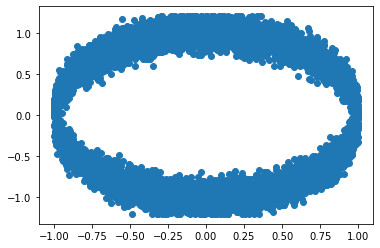

In [4]:
x_ls = np.random.uniform(-1, 1, size = 10000)
data = [(x, clip((f1(x) if np.random.uniform()<0.5 else f2(x))+
         np.random.normal(scale=0.1), -1.2, 1.2)) for x in x_ls]
plt.scatter(*zip(*data))

In [5]:
x_range = -0
selected = [item[1] for item in data if x_range-0.1 < item[0] < x_range+0.1 ]

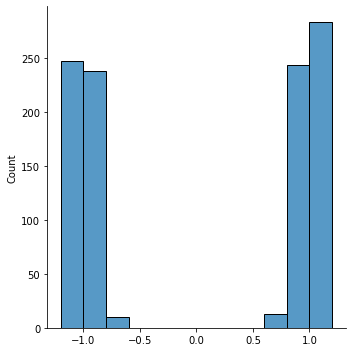

In [6]:
sns.displot(selected)

In [7]:
def nn_constructor(param, model_in, model_out):
    model = BNN(param)
    if not param.load_model:
        model.add(FC(16, input_dim=model_in, activation="swish", weight_decay=0.000025))
        model.add(FC(16, activation="swish", weight_decay=0.000075))
        model.add(FC(model_out, weight_decay=0.0001))
    model.finalize(tf.train.AdamOptimizer, {"learning_rate": 0.001})
    return model

In [8]:
config = DotMap(name = "BNN", 
                model_dir = "models", 
                sess = None, 
                load_model = False, 
                num_networks = 3
                )

model = nn_constructor(config, 1, 1)



Created an ensemble of 3 neural networks with variance predictions.





In [9]:
X, y = list(zip(*data))
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [10]:
model.train(X, y)

Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.


Network training: 100%|██████████| 100/100 [01:09<00:00,  1.43epoch(s)/s, Training loss(es)=[0.6777016 0.6736005 0.6725719]]  


In [14]:
model.predict(np.array([[0], [1]]), factored = True)

[array([[[ 0.01045116],
         [-0.02484879]],
 
        [[ 0.01983463],
         [ 0.02343607]],
 
        [[ 0.01311149],
         [-0.00528499]]], dtype=float32),
 array([[[0.91754067],
         [0.0709071 ]],
 
        [[0.9241078 ],
         [0.06986716]],
 
        [[0.91935575],
         [0.07497034]]], dtype=float32)]